In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Fintech Data - Assignment - Prashant - Sheet1.csv")
df

,Date,Region,Cohort,Format,Device,Gender,Age,Income,Spends,Impressions,Clicks,Views,Install,Registration
0,01-09-2024,AHD,InMarket for Finance,NoSkip,Android,Males,3544,T30Inc,₹43,287,8,-,-,-
1,02-09-2024,AHD,InMarket for Finance,NoSkip,Android,Males,3544,T30Inc,"₹17,233","121,159","1,181",-,2,-
2,03-09-2024,AHD,InMarket for Finance,NoSkip,Android,Males,3544,T30Inc,"₹27,448","223,412","2,361",-,5,-
3,04-09-2024,AHD,InMarket for Finance,NoSkip,Android,Males,3544,T30Inc,"₹24,521","193,313","2,341",-,6,1
4,05-09-2024,AHD,InMarket for Finance,NoSkip,Android,Males,3544,T30Inc,"₹1,768","19,701",143,-,2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,03-10-2024,WEST,Lookalike Targeting,Skip,Android,Males,4554,AllInc,"₹18,608","71,434",47,"18,535",1,-
9088,04-10-2024,WEST,Lookalike Targeting,Skip,Android,Males,4554,AllInc,"₹21,383","78,664",39,"20,825",-,-
9089,05-10-2024,WEST,Lookalike Targeting,Skip,Android,Males,4554,AllInc,"₹7,343","23,598",16,"6,849",-,-
9090,06-10-2024,WEST,Lookalike Targeting,Skip,Android,Males,4554,AllInc,"₹2,224","10,540",4,"2,344",-,-


In [5]:
df.describe().T

,count,unique,top,freq
Date,9092,39,03-10-2024,601
Region,9092,16,ALL,964
Cohort,9092,7,Search Targeting,3125
Format,9092,2,NoSkip,4854
Device,9092,3,Android,3967
Gender,9092,3,Males,6200
Age,9092,6,AllAge,3742
Income,9092,3,AllInc,4752
Spends,9092,4065,₹0,434
Impressions,9092,5127,1,184


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          9092 non-null   object
 1   Region        9092 non-null   object
 2   Cohort        9092 non-null   object
 3   Format        9092 non-null   object
 4   Device        9092 non-null   object
 5   Gender        9092 non-null   object
 6   Age           9092 non-null   object
 7   Income        9092 non-null   object
 8   Spends        9092 non-null   object
 9   Impressions   9092 non-null   object
 10  Clicks        9092 non-null   object
 11  Views         9092 non-null   object
 12  Install       9092 non-null   object
 13  Registration  9092 non-null   object
dtypes: object(14)
memory usage: 994.6+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

In [11]:
df['Region'].unique()

array(['AHD', 'ALL', 'BBSR', 'BLR', 'MMR', 'CCTY', 'NCR', 'EAST', 'HYD',
       'KOL', 'MET', 'NCTY', 'PNE', 'PUN', 'UP', 'WEST'], dtype=object)

In [13]:
df['Cohort'].unique()

array(['InMarket for Finance', 'Channels Targeting', 'Search Targeting',
       'Lookalike Targeting', 'ReTargeting', 'Keyword Targeting',
       'Open Targeting'], dtype=object)

In [15]:
df['Format'].unique()

array(['NoSkip', 'Skip'], dtype=object)

In [17]:
df['Device'].unique()

array(['Android', 'iOS', 'CTV&Desktop'], dtype=object)

In [19]:
df['Gender'].unique()

array(['Males', 'Females', 'Both'], dtype=object)

In [21]:
df['Age'].unique()

array(['3544', '2534', '2544', 'AllAge', '4554', '2554'], dtype=object)

In [23]:
age_mapping = {
    '2534' : '25-34',
    '2544' : '25-44',
    '2554' : '25-54',
    '3544' : '35-44',
    '4554' : '45-54',
    'AllAge' : 'All Ages'
}
df['Age'] = df['Age'].replace(age_mapping)
df['Age'].unique()

array(['35-44', '25-34', '25-44', 'All Ages', '45-54', '25-54'],
      dtype=object)

In [25]:
df['Income'].unique()

array(['T30Inc', 'AllInc', 'T50Inc'], dtype=object)

In [27]:
df['Spends'].unique()

array(['₹43', '₹17,233', '₹27,448', ..., '₹18,608', '₹21,383', '₹7,343'],
      dtype=object)

In [29]:
df['Spends'] = df['Spends'].replace({'₹':'',',':''}, regex=True).astype(float)
df['Spends']

0          43.0
1       17233.0
2       27448.0
3       24521.0
4        1768.0
         ...   
9087    18608.0
9088    21383.0
9089     7343.0
9090     2224.0
9091      492.0
Name: Spends, Length: 9092, dtype: float64

In [31]:
df['Impressions']

0           287
1       121,159
2       223,412
3       193,313
4        19,701
         ...   
9087     71,434
9088     78,664
9089     23,598
9090     10,540
9091      2,746
Name: Impressions, Length: 9092, dtype: object

In [33]:
df['Impressions'] = df['Impressions'].replace({',':'','-':'0','':'0'}, regex = True).astype(int)
df['Impressions']

0          287
1       121159
2       223412
3       193313
4        19701
         ...  
9087     71434
9088     78664
9089     23598
9090     10540
9091      2746
Name: Impressions, Length: 9092, dtype: int32

In [35]:
df['Impressions']

0          287
1       121159
2       223412
3       193313
4        19701
         ...  
9087     71434
9088     78664
9089     23598
9090     10540
9091      2746
Name: Impressions, Length: 9092, dtype: int32

In [37]:
df['Clicks']

0           8
1       1,181
2       2,361
3       2,341
4         143
        ...  
9087       47
9088       39
9089       16
9090        4
9091        1
Name: Clicks, Length: 9092, dtype: object

In [39]:
df['Clicks'] = df['Clicks'].replace({',':'','-':'0'}, regex = True).astype(int)
df['Clicks']

0          8
1       1181
2       2361
3       2341
4        143
        ... 
9087      47
9088      39
9089      16
9090       4
9091       1
Name: Clicks, Length: 9092, dtype: int32

In [41]:
df['Views'].unique()

array(['-', '5', '3', ..., '18,535', '6,849', '1,056'], dtype=object)

In [43]:
df['Views'] = df['Views'].replace({'-':'0',',':''}, regex = True).astype(int)
df['Views']

0           0
1           0
2           0
3           0
4           0
        ...  
9087    18535
9088    20825
9089     6849
9090     2344
9091     1056
Name: Views, Length: 9092, dtype: int32

In [45]:
df['Install'] = df['Install'].replace({'-':'0'}, regex=True).astype(int)
df['Install'].unique()

array([  0,   2,   5,   6,   3,   8,   1,   7,   4,  15,  10,  19,  62,
        52,  85,  50,  32,  14,  27,  33,  22,  16,  17,   9,  11,  13,
        26,  44,  18,  53,  42,  46,  57,  47,  31,  48,  29,  37,  49,
        41,  24,  36,  20,  21,  23,  51,  95, 209,  79,  43,  28,  12,
        30])

In [48]:
df['Registration'].unique()

array(['-', '1', '2', '5', '4', '3', '9', '28', '33', '39', '25', '6',
       '12', '7', '8', '10', '19', '43', '42', '26', '24', '21', '17',
       '13', '11', '47', '98', '50', '54', '31', '23', '35', '38', '49',
       '32', '14', '34', '119', '103', '161', '65', '27', '18', '104',
       '153', '148', '118', '88', '107', '83', '130', '112', '115', '87',
       '85', '52', '61', '56', '29', '37', '70', '76', '82', '63', '165',
       '95', '15', '129', '20', '30'], dtype=object)

In [50]:
df['Registration'] = df['Registration'].replace({'-':'0'}, regex=True).astype(int)
df['Registration']

0       0
1       0
2       0
3       1
4       0
       ..
9087    0
9088    0
9089    0
9090    0
9091    0
Name: Registration, Length: 9092, dtype: int32

In [52]:
df.columns

Index(['Date', 'Region', 'Cohort', 'Format', 'Device', 'Gender', 'Age',
       'Income', 'Spends', 'Impressions', 'Clicks', 'Views', 'Install',
       'Registration'],
      dtype='object')

In [54]:
df.shape

(9092, 14)

In [56]:
df[df['Install']>df['Clicks']].shape

(38, 14)

In [58]:
df[df['Install']<=df['Clicks']].shape

(9054, 14)

In [61]:
df[df['Registration']>df['Install']].shape

(607, 14)

In [63]:
df[df['Registration']<=df['Install']].shape

(8485, 14)

In [65]:
df[(df['Install']<=df['Clicks']) & (df['Registration']<=df['Install'])].shape

(8449, 14)

In [67]:
df = df[(df['Install']<=df['Clicks']) & (df['Registration']<=df['Install'])]

In [69]:
# pd.set_option('display.max_rows', None)

In [71]:
df_1 = df
df_1

,Date,Region,Cohort,Format,Device,Gender,Age,Income,Spends,Impressions,Clicks,Views,Install,Registration
0,2024-09-01,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,43.0,287,8,0,0,0
1,2024-09-02,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,17233.0,121159,1181,0,2,0
2,2024-09-03,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,27448.0,223412,2361,0,5,0
3,2024-09-04,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,24521.0,193313,2341,0,6,1
4,2024-09-05,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,1768.0,19701,143,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,2024-10-03,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,18608.0,71434,47,18535,1,0
9088,2024-10-04,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,21383.0,78664,39,20825,0,0
9089,2024-10-05,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,7343.0,23598,16,6849,0,0
9090,2024-10-06,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,2224.0,10540,4,2344,0,0


In [73]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8449 entries, 0 to 9091
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8449 non-null   datetime64[ns]
 1   Region        8449 non-null   object        
 2   Cohort        8449 non-null   object        
 3   Format        8449 non-null   object        
 4   Device        8449 non-null   object        
 5   Gender        8449 non-null   object        
 6   Age           8449 non-null   object        
 7   Income        8449 non-null   object        
 8   Spends        8449 non-null   float64       
 9   Impressions   8449 non-null   int32         
 10  Clicks        8449 non-null   int32         
 11  Views         8449 non-null   int32         
 12  Install       8449 non-null   int32         
 13  Registration  8449 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(5), object(7)
memory usage: 825.1+ KB


In [75]:
df_1.sort_values(by='Date', ascending=True)

,Date,Region,Cohort,Format,Device,Gender,Age,Income,Spends,Impressions,Clicks,Views,Install,Registration
0,2024-09-01,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,43.0,287,8,0,0,0
4491,2024-09-01,NCR,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,21.0,148,1,0,0,0
361,2024-09-01,AHD,Search Targeting,NoSkip,CTV&Desktop,Males,All Ages,T50Inc,1.0,3,0,0,0,0
4502,2024-09-01,NCR,InMarket for Finance,NoSkip,Android,Males,25-34,T30Inc,23.0,160,3,0,0,0
4539,2024-09-01,NCR,InMarket for Finance,NoSkip,CTV&Desktop,Males,25-44,T30Inc,77.0,368,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2024-10-08,ALL,ReTargeting,NoSkip,Android,Males,35-44,AllInc,0.0,0,0,0,0,0
8905,2024-10-08,UP,Search Targeting,Skip,Android,Males,45-54,AllInc,0.0,0,0,0,0,0
5332,2024-10-08,EAST,Search Targeting,Skip,Android,Both,45-54,AllInc,0.0,0,0,0,0,0
1297,2024-10-08,ALL,ReTargeting,NoSkip,Android,Males,45-54,T30Inc,0.0,0,0,0,0,0


# Key Metrics Summary

In [78]:
#	Campaign duration 2024-09-01 to 2024-10-09

**Total No. of Impressions**

In [81]:
df_1['Impressions'].sum()     

129746949

In [83]:
df_1['Impressions'].sum()/10000000     

12.9746949

**Total No. of Clicks**

In [86]:
df_1['Clicks'].sum()

870307

In [88]:
df_1['Clicks'].sum()/100000


8.70307

**Total No of Views**

In [91]:
df_1['Views'].sum()

17500211

In [93]:
df_1['Views'].sum()/10000000

1.7500211

**Total No. of Installs**

In [96]:
df_1['Install'].sum()

6299

In [98]:
df_1['Install'].sum()/1000

6.299

**Total No. of Registrations**

In [101]:
df_1['Registration'].sum()

2249

In [103]:
df_1['Registration'].sum()/1000

2.249

**CTR (Click-Through Rate): [Clicks/Impressions %]**

In [106]:
df_1['Clicks'].sum()/df_1['Impressions'].sum()*100

0.670772612926721

**Install Rate: [Installs/Clicks %]**

In [109]:
df_1['Install'].sum()/df_1['Clicks'].sum()*100

0.7237675900573016

**Registration Rate: [Registrations/Installs %]**

In [112]:
df_1['Registration'].sum()/df_1['Install'].sum()*100

35.70408001270043

# More Detain Analysis

**CTR, Install Rate, Registration Rate columns**

In [117]:
df_1['CTR'] = df_1['Clicks']/df_1['Impressions']*100
df_1['Install_Rate'] = df_1['Install']/df_1['Clicks']*100
df_1['Registration_Rate'] = df_1['Registration']/df_1['Install']*100

C:\Users\prash\AppData\Local\Temp\ipykernel_8564\2257509615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['CTR'] = df_1['Clicks']/df_1['Impressions']*100
C:\Users\prash\AppData\Local\Temp\ipykernel_8564\2257509615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Install_Rate'] = df_1['Install']/df_1['Clicks']*100
C:\Users\prash\AppData\Local\Temp\ipykernel_8564\2257509615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [119]:
df_1

,Date,Region,Cohort,Format,Device,Gender,Age,Income,Spends,Impressions,Clicks,Views,Install,Registration,CTR,Install_Rate,Registration_Rate
0,2024-09-01,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,43.0,287,8,0,0,0,2.787456,0.000000,NaN
1,2024-09-02,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,17233.0,121159,1181,0,2,0,0.974752,0.169348,0.000000
2,2024-09-03,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,27448.0,223412,2361,0,5,0,1.056792,0.211775,0.000000
3,2024-09-04,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,24521.0,193313,2341,0,6,1,1.210989,0.256301,16.666667
4,2024-09-05,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,1768.0,19701,143,0,2,0,0.725851,1.398601,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,2024-10-03,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,18608.0,71434,47,18535,1,0,0.065795,2.127660,0.000000
9088,2024-10-04,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,21383.0,78664,39,20825,0,0,0.049578,0.000000,NaN
9089,2024-10-05,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,7343.0,23598,16,6849,0,0,0.067802,0.000000,NaN
9090,2024-10-06,WEST,Lookalike Targeting,Skip,Android,Males,45-54,AllInc,2224.0,10540,4,2344,0,0,0.037951,0.000000,NaN


**Regional Performance**

In [123]:
CTR_Int_rate = df_1.groupby(['Region']).agg({'CTR':'mean', 'Install_Rate':'mean'}).sort_values(by='Install_Rate', ascending=False).head(10)
CTR_Int_rate

,CTR,Install_Rate
Region,,
ALL,0.311285,1.953275
PUN,0.318127,1.855905
WEST,0.282859,1.815983
NCTY,0.451693,1.536743
UP,0.326182,1.530759
CCTY,0.504452,1.372248
BLR,0.356653,1.333441
KOL,0.336182,1.314796
BBSR,0.358036,1.202257


In [125]:
df_1.groupby(['Region']).agg({'CTR':'mean', 'Install_Rate':'mean'}).sort_values(by='Install_Rate', ascending=False)

,CTR,Install_Rate
Region,,
ALL,0.311285,1.953275
PUN,0.318127,1.855905
WEST,0.282859,1.815983
NCTY,0.451693,1.536743
UP,0.326182,1.530759
CCTY,0.504452,1.372248
BLR,0.356653,1.333441
KOL,0.336182,1.314796
BBSR,0.358036,1.202257


In [127]:
reg_rate = df_1.groupby(['Region']).agg({'Registration_Rate':'mean'}).sort_values(by='Registration_Rate', ascending=False).head(10)
reg_rate

,Registration_Rate
Region,
MET,75.000000
ALL,51.126583
UP,38.735566
NCR,34.362828
EAST,31.318707
CCTY,30.324707
HYD,29.992959
NCTY,29.967664
BLR,28.162718


In [129]:
df_1.groupby(['Region']).agg({'Registration_Rate':'mean'}).sort_values(by='Registration_Rate', ascending=False)

,Registration_Rate
Region,
MET,75.000000
ALL,51.126583
UP,38.735566
NCR,34.362828
EAST,31.318707
CCTY,30.324707
HYD,29.992959
NCTY,29.967664
BLR,28.162718


In [132]:
# CTR_Int_rate.plot(kind='bar', figsize=(10,6))
# reg_rate.plot(kind='bar', figsize=(10,6))

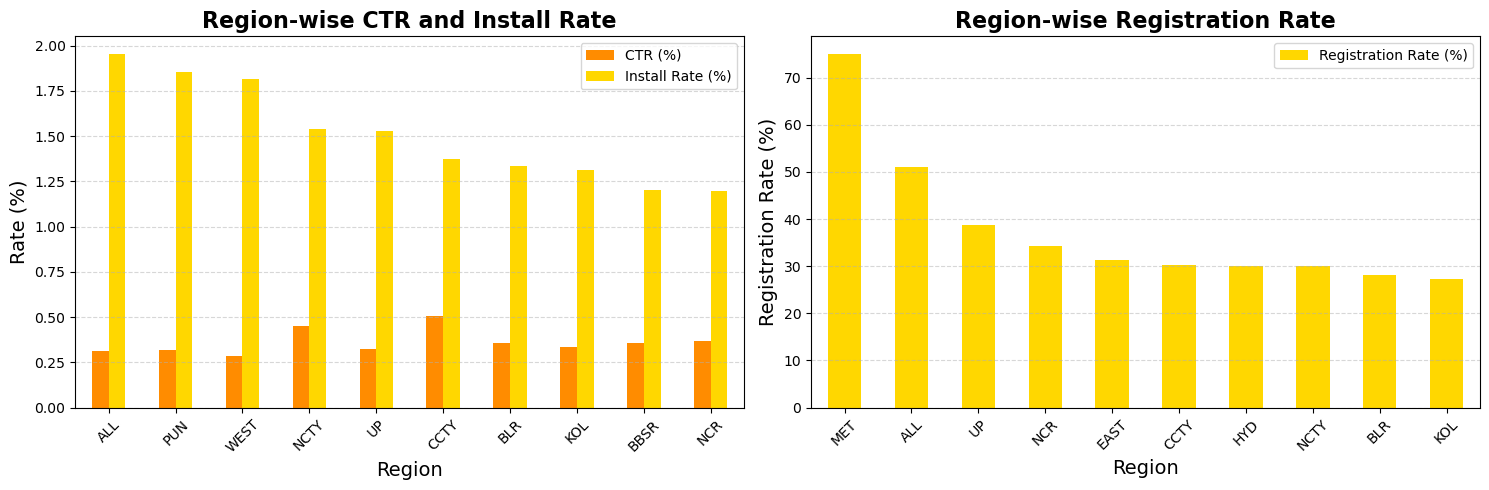

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# First subplot: CTR and Install Rate
CTR_Int_rate.plot(
    kind='bar', 
    color=['#FF8C00', '#FFD700'],  # dark orange and dark yellow
    ax=axes[0]
)
axes[0].set_title('Region-wise CTR and Install Rate', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Region', fontsize=14)
axes[0].set_ylabel('Rate (%)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].legend(['CTR (%)', 'Install Rate (%)'], loc='upper right')

# Second subplot: Registration Rate
reg_rate.plot(
    kind='bar', 
    color='#FFD700',  # dark orange for registration rate
    ax=axes[1]
)
axes[1].set_title('Region-wise Registration Rate', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Region', fontsize=14)
axes[1].set_ylabel('Registration Rate (%)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].legend(['Registration Rate (%)'], loc='upper right')

plt.tight_layout()
plt.show()


**Device Analysis**

In [139]:
df_1['Device'].unique()

array(['Android', 'iOS', 'CTV&Desktop'], dtype=object)

In [140]:
reg_dev_sum = df_1.groupby(['Device']).agg({'Impressions':'sum','Clicks':'sum','Views':'sum','Install':'sum','Registration':'sum'})
reg_dev_sum

,Impressions,Clicks,Views,Install,Registration
Device,,,,,
Android,93171969,794290,11417815,5634,1956
CTV&Desktop,23414405,27474,5421430,201,91
iOS,13160575,48543,660966,464,202


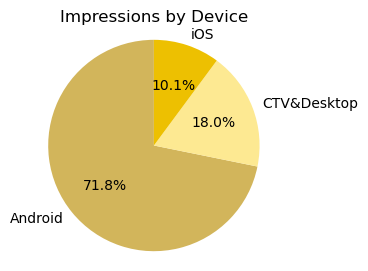

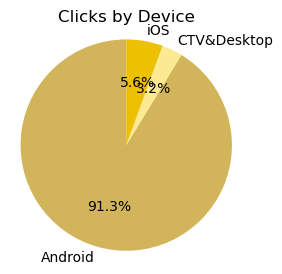

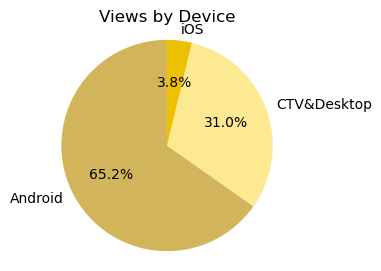

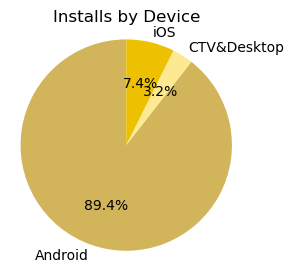

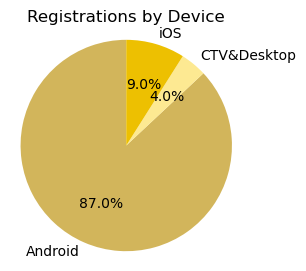

In [141]:
import matplotlib.pyplot as plt

# Define custom colors
colors = [ '#D2B55B','#FDE992', '#EDC001']

# Pie Chart for Impressions by Device
plt.figure(figsize=(3, 3))
plt.pie(
    reg_dev_sum['Impressions'],
    labels=reg_dev_sum.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Impressions by Device')
plt.axis('equal')
plt.show()

# Pie Chart for Clicks by Device
plt.figure(figsize=(3, 3))
plt.pie(
    reg_dev_sum['Clicks'],
    labels=reg_dev_sum.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Clicks by Device')
plt.axis('equal')
plt.show()

# Pie Chart for Views by Device
plt.figure(figsize=(3, 3))
plt.pie(
    reg_dev_sum['Views'],
    labels=reg_dev_sum.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Views by Device')
plt.axis('equal')
plt.show()

# Pie Chart for Installs by Device
plt.figure(figsize=(3, 3))
plt.pie(
    reg_dev_sum['Install'],
    labels=reg_dev_sum.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Installs by Device')
plt.axis('equal')
plt.show()

# Pie Chart for Registrations by Device
plt.figure(figsize=(3, 3))
plt.pie(
    reg_dev_sum['Registration'],
    labels=reg_dev_sum.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Registrations by Device')
plt.axis('equal')
plt.show()


NameError: name 'impr_dev_sum' is not defined

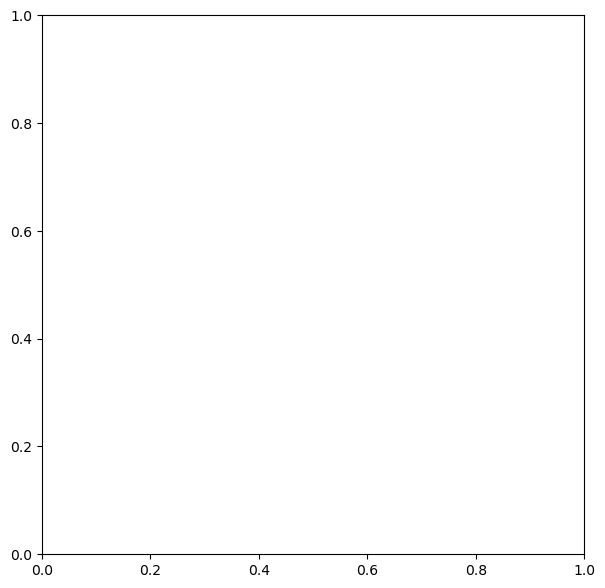

In [146]:
# Warm color palette (same as above)
colors = ['#D2B55B', '#FDE992', '#EDC001']

fig, ax = plt.subplots(figsize=(7, 7))

# Pie chart for Impressions
ax.pie(impr_dev_sum['Impressions'], 
       labels=impr_dev_sum.index, 
       autopct='%1.1f%%', 
       startangle=90, 
       colors=colors)
ax.set_title('Impressions Distribution by Device', fontsize=18, fontweight='bold', color='darkorange')
ax.legend(impr_dev_sum.index, title='Devices', loc='best', fontsize=12, frameon=False, title_fontsize=14)
ax.axis('equal')

plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Warm color palette
colors = ['#D2B55B', '#FDE992', '#EDC001']  # Dark Yellow tones

fig, ax = plt.subplots(figsize=(7, 7))

# Pie chart for Registration
ax.pie(reg_dev_sum['Registration'], 
       labels=reg_dev_sum.index, 
       autopct='%1.1f%%', 
       startangle=90, 
       colors=colors)
ax.set_title('Registration Distribution by Device', fontsize=18, fontweight='bold', color='darkorange')
ax.legend(reg_dev_sum.index, title='Devices', loc='best', fontsize=12, frameon=False, title_fontsize=14)
ax.axis('equal')  # Keeps the pie circular

plt.tight_layout()
plt.show()


**Gender Analysis**

In [ ]:
gender_summary = df_1.groupby(['Gender']).agg({'Impressions':'sum','Clicks':'sum','Views':'sum', 'Install': 'sum', 'Registration': 'sum'}).reset_index()
gender_summary

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
colors = ['#FDE992', '#EDC001', '#D2B55B']

# Pie Chart for Impressions
plt.figure(figsize=(6, 6))
plt.pie(
    gender_summary['Impressions'],
    labels=gender_summary['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Impressions by Gender')
plt.axis('equal')
plt.show()

# Pie Chart for Clicks
plt.figure(figsize=(6, 6))
plt.pie(
    gender_summary['Clicks'],
    labels=gender_summary['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Clicks by Gender')
plt.axis('equal')
plt.show()

# Pie Chart for Views
plt.figure(figsize=(6, 6))
plt.pie(
    gender_summary['Views'],
    labels=gender_summary['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Views by Gender')
plt.axis('equal')
plt.show()

# Pie Chart for Installs
plt.figure(figsize=(6, 6))
plt.pie(
    gender_summary['Install'],
    labels=gender_summary['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Installs by Gender')
plt.axis('equal')
plt.show()

# Pie Chart for Registrations
plt.figure(figsize=(6, 6))
plt.pie(
    gender_summary['Registration'],
    labels=gender_summary['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Registrations by Gender')
plt.axis('equal')
plt.show()


In [ ]:
# Set figure size
plt.figure(figsize=(7,5))

# Plot the pie chart
plt.pie(
    gender_summary['Install'],
    labels=gender_summary['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FDE992', '#EDC001','#D2B55B'],
    textprops={'fontsize': 12, 'color': 'black'}
)

# Add a title
plt.title('Install Distribution by Gender', fontsize=18, fontweight='bold', color='darkblue')

# Display legend
plt.legend(
    gender_summary['Gender'],
    title='Gender',
    loc='best',
    fontsize=12,
    frameon=False,
    title_fontsize=14
)

# Make the pie chart a perfect circle
plt.axis('equal')
plt.tight_layout()

# Show plot
plt.show()

**Age wise Analysis**

In [ ]:
age_reg = df_1.groupby(['Age']).agg({'Registration': 'sum'}).sort_values(by = 'Registration', ascending = False)
age_reg

In [ ]:
age_impr = df_1.groupby(['Age']).agg({'Impressions': 'sum'}).sort_values(by = 'Impressions', ascending = False)
age_impr

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Registration by Age
age_reg.plot(
    kind='bar', 
    color='#FFD700', 
    ax=axes[0],
    edgecolor='black'
)
axes[0].set_title('Registrations by Age Group', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=14)
axes[0].set_ylabel('Total Registrations', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(['Registrations'], loc='upper right', fontsize=12)

# Second plot: Impressions by Age
age_impr.plot(
    kind='bar', 
    color='#FFD700', 
    ax=axes[1],
    edgecolor='black'
)
axes[1].set_title('Impressions by Age Group', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Age Group', fontsize=14)
axes[1].set_ylabel('Total Impressions', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(['Impressions'], loc='upper right', fontsize=12)

# Format y-axis labels in terms of millions
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x*1e-6:.1f}M'

axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(millions))

# Adjust layout
plt.tight_layout()
plt.show()


In [149]:
Age_reg_rate = df_1.groupby(['Age']).agg({'Registration_Rate': 'mean'}).sort_values('Age', ascending=True)
Age_reg_rate

,Registration_Rate
Age,
25-34,22.583800
25-44,40.777867
25-54,21.894101
35-44,25.470885
45-54,19.764460
All Ages,34.863025


In [154]:
Age_inst_CTR_rate = df_1.groupby(['Age']).agg({'Install_Rate': 'mean','CTR':'mean'}).sort_values('Age', ascending=True)
Age_inst_CTR_rate

,Install_Rate,CTR
Age,,
25-34,1.297868,0.725370
25-44,0.964249,0.279967
25-54,0.581651,0.397023
35-44,1.340049,0.714658
45-54,1.135920,0.376315
All Ages,1.636230,0.323250


In [156]:
spend_by_age = df_1.groupby(['Age']).agg({'Spends': 'sum'}).sort_values(by = 'Age', ascending = True)
spend_by_age['Spends_in_Lakhs'] = (spend_by_age['Spends'] / 1_00_000).round(2) 
spend_by_age = spend_by_age[['Spends_in_Lakhs']]
spend_by_age

,Spends_in_Lakhs
Age,
25-34,12.75
25-44,62.40
25-54,26.89
35-44,27.76
45-54,42.91
All Ages,131.98


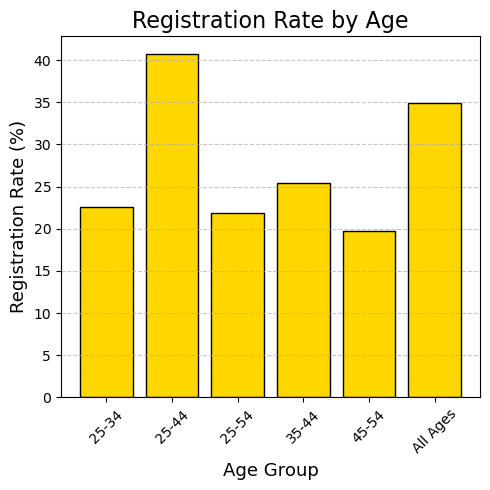

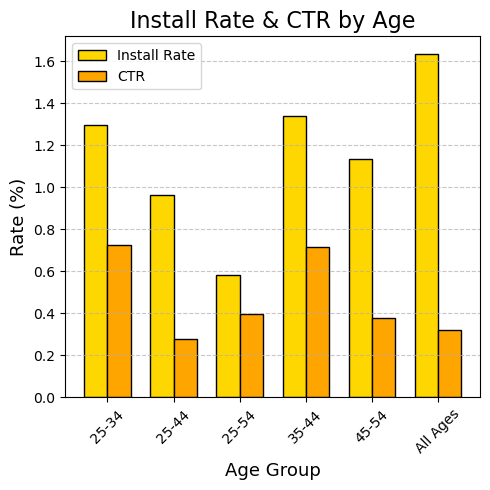

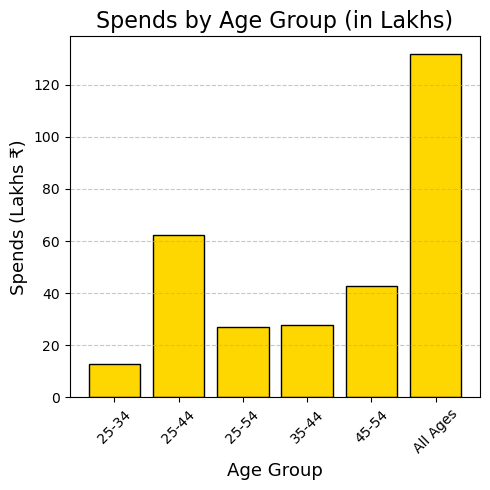

In [158]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming Age_reg_rate, Age_inst_CTR_rate, and spend_by_age are already calculated as shown in your snippet

# 1. Registration Rate by Age
plt.figure(figsize=(5, 5))
plt.bar(Age_reg_rate.index.astype(str), Age_reg_rate['Registration_Rate'], color='GOLD', edgecolor='black')
plt.title('Registration Rate by Age', fontsize=16)
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Registration Rate (%)', fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Install Rate & CTR by Age
x = Age_inst_CTR_rate.index.astype(str)
width = 0.35
x_pos = range(len(x))

plt.figure(figsize=(5, 5))
plt.bar([i - width/2 for i in x_pos], Age_inst_CTR_rate['Install_Rate'], width=width, label='Install Rate', color='GOLD', edgecolor='black')
plt.bar([i + width/2 for i in x_pos], Age_inst_CTR_rate['CTR'], width=width, label='CTR', color='orange', edgecolor='black')

plt.xticks(ticks=x_pos, labels=x, rotation=45)
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Rate (%)', fontsize=13)
plt.title('Install Rate & CTR by Age', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Spends by Age Group (in Lakhs)
plt.figure(figsize=(5, 5))
plt.bar(spend_by_age.index.astype(str), spend_by_age['Spends_in_Lakhs'], color='GOLD', edgecolor='black')
plt.title('Spends by Age Group (in Lakhs)', fontsize=16)
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Spends (Lakhs ₹)', fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Income Segment Performance**

In [162]:
Income_reg_rate = df_1.groupby(['Income']).agg({'Registration_Rate': 'mean'}).sort_values('Registration_Rate', ascending=False)
Income_reg_rate

,Registration_Rate
Income,
AllInc,34.723305
T50Inc,27.426540
T30Inc,23.144632


In [165]:
Income_ctr_inst_rate = df_1.groupby(['Income']).agg({'CTR': 'mean', 'Install_Rate':'mean'}).sort_values('Install_Rate', ascending=False)
Income_ctr_inst_rate

,CTR,Install_Rate
Income,,
AllInc,0.339605,1.532856
T50Inc,0.383843,1.239540
T30Inc,0.482184,0.814628


In [167]:
spend_by_inco = df_1.groupby(['Income']).agg({'Spends': 'sum'}).sort_values(by = 'Spends', ascending = False)
spend_by_inco['Spends_in_Lakhs'] = (spend_by_inco['Spends'] / 1_00_000).round(2)
spend_by_inco = spend_by_inco[['Spends_in_Lakhs']]
spend_by_inco

,Spends_in_Lakhs
Income,
AllInc,123.59
T50Inc,102.61
T30Inc,78.50


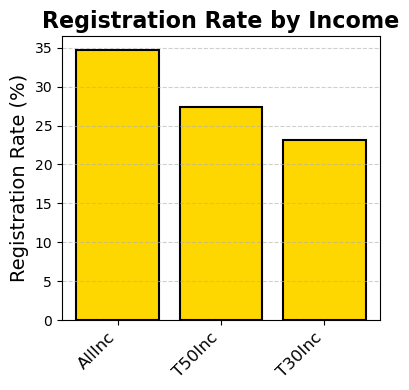

In [169]:
plt.figure(figsize=(4, 4))
plt.bar(
    Income_reg_rate.index,
    Income_reg_rate['Registration_Rate'],
    color='#FFD700',
    edgecolor='black',
    linewidth=1.5
)
plt.title('Registration Rate by Income', fontsize=16, fontweight='bold')
plt.ylabel('Registration Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


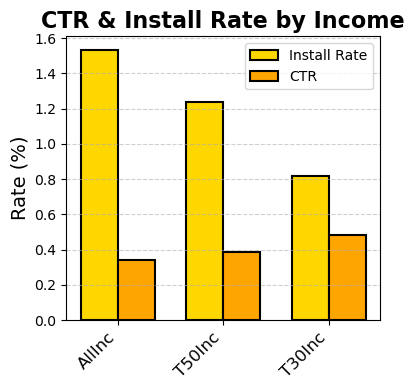

In [171]:
x = np.arange(len(Income_ctr_inst_rate.index))
width = 0.35

plt.figure(figsize=(4, 4))
plt.bar(
    x - width/2,
    Income_ctr_inst_rate['Install_Rate'],
    width=width,
    label='Install Rate',
    color='#FFD700',
    edgecolor='black',
    linewidth=1.5
)
plt.bar(
    x + width/2,
    Income_ctr_inst_rate['CTR'],
    width=width,
    label='CTR',
    color='#FFA500',
    edgecolor='black',
    linewidth=1.5
)
plt.title('CTR & Install Rate by Income', fontsize=16, fontweight='bold')
plt.ylabel('Rate (%)', fontsize=14)
plt.xticks(x, Income_ctr_inst_rate.index, rotation=45, ha='right', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


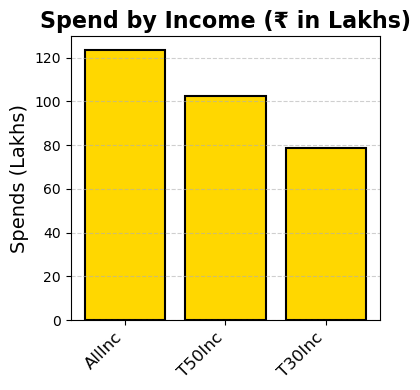

In [172]:
plt.figure(figsize=(4, 4))
plt.bar(
    spend_by_inco.index,
    spend_by_inco['Spends_in_Lakhs'],
    color='#FFD700',
    edgecolor='black',
    linewidth=1.5
)
plt.title('Spend by Income (₹ in Lakhs)', fontsize=16, fontweight='bold')
plt.ylabel('Spends (Lakhs)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Trends Over Time**

In [177]:
df_1['Weekday'] = df_1['Date'].dt.day_name()
df_1['day'] = df_1['Date'].dt.day

C:\Users\prash\AppData\Local\Temp\ipykernel_8564\3430934194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Weekday'] = df_1['Date'].dt.day_name()
C:\Users\prash\AppData\Local\Temp\ipykernel_8564\3430934194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['day'] = df_1['Date'].dt.day


In [179]:
pivot = pd.crosstab(index = df_1['Region'], columns = df_1['Weekday']).sort_values(by = 'Sunday', ascending=False).head(5)
pivot

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Region,,,,,,,
BLR,104,135,111,131,106,103,111
ALL,102,128,112,130,106,102,101
MMR,102,127,101,127,98,94,94
NCR,93,125,106,124,91,93,97
NCTY,101,121,99,124,95,87,93


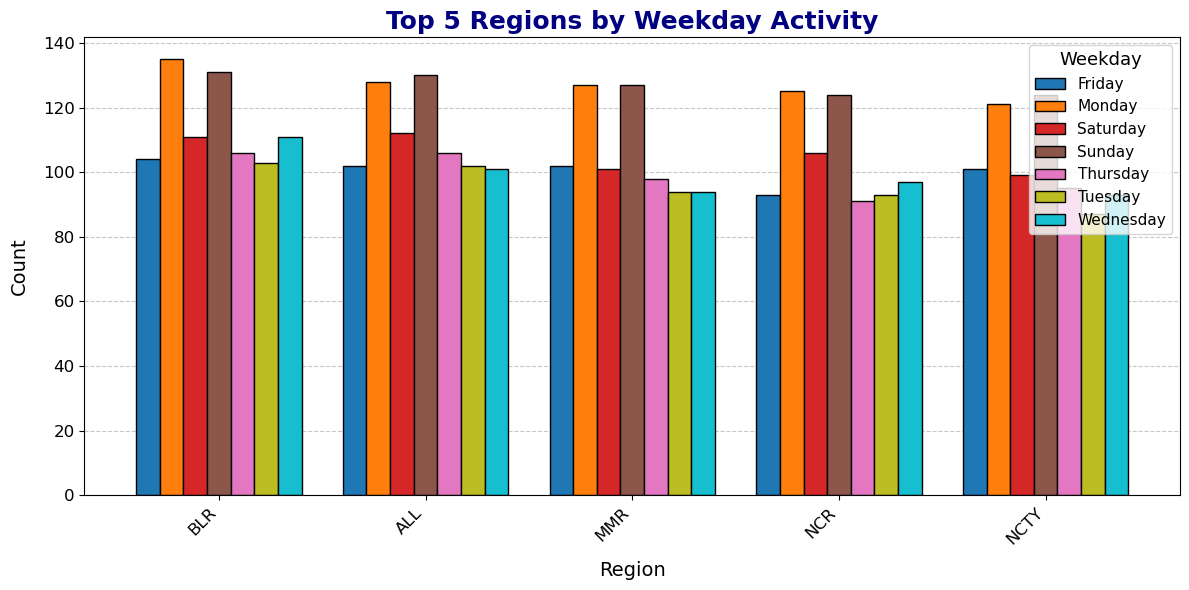

In [182]:
# Plot
ax = pivot.plot(kind='bar', figsize=(12, 6), width=0.8, edgecolor='black', colormap='tab10')

# Titles and labels
ax.set_title('Top 5 Regions by Weekday Activity', fontsize=18, fontweight='bold', color='navy')
ax.set_xlabel('Region', fontsize=14, labelpad=10)
ax.set_ylabel('Count', fontsize=14, labelpad=10)

# Grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(title='Weekday', title_fontsize=13, fontsize=11)

# Tight layout
plt.tight_layout()

# Show
plt.show()

**Cohort Analysis**

In [186]:
Cohort_reg_rate = df_1.groupby(['Cohort']).agg({'Registration_Rate': 'mean'}).sort_values('Registration_Rate', ascending=False)
Cohort_reg_rate

,Registration_Rate
Cohort,
Channels Targeting,51.136270
Keyword Targeting,44.274536
ReTargeting,42.307692
Open Targeting,31.349206
InMarket for Finance,30.829558
Search Targeting,27.612743
Lookalike Targeting,18.039059


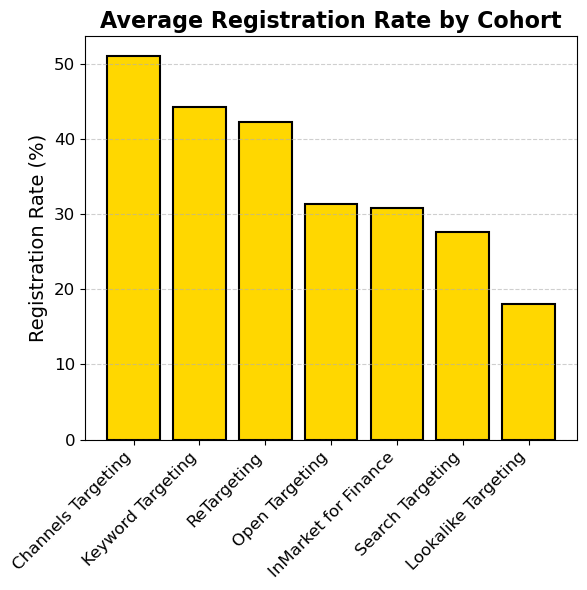

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.bar(
    Cohort_reg_rate.index, 
    Cohort_reg_rate['Registration_Rate'], 
    color='gold', 
    edgecolor='black', 
    linewidth=1.5
)
plt.title('Average Registration Rate by Cohort', fontsize=16, fontweight='bold')
plt.ylabel('Registration Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [189]:
Cohort_CTR_inst_rate = df_1.groupby(['Cohort']).agg({'CTR': 'mean', 'Install_Rate':'mean'}).sort_values('Install_Rate', ascending=False)
Cohort_CTR_inst_rate

,CTR,Install_Rate
Cohort,,
Channels Targeting,0.332654,2.327030
ReTargeting,0.374283,1.794072
Open Targeting,0.286227,1.780759
Lookalike Targeting,0.419353,1.536397
Keyword Targeting,0.544604,0.962251
InMarket for Finance,0.445488,0.955817
Search Targeting,0.382861,0.818300


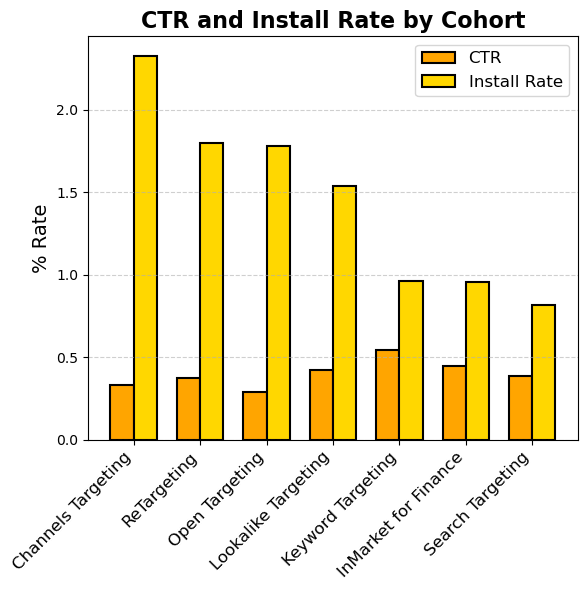

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Extract data
labels = Cohort_CTR_inst_rate.index
ctr = Cohort_CTR_inst_rate['CTR']
install_rate = Cohort_CTR_inst_rate['Install_Rate']

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
bar1 = ax.bar(x - width/2, ctr, width, label='CTR', color='orange', edgecolor='black', linewidth=1.5)
bar2 = ax.bar(x + width/2, install_rate, width, label='Install Rate', color='gold', edgecolor='black', linewidth=1.5)

# Labels & ticks
ax.set_ylabel('% Rate', fontsize=14)
ax.set_title('CTR and Install Rate by Cohort', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [193]:
spend_by_coht = df_1.groupby(['Cohort']).agg({'Spends': 'sum'}).sort_values(by = 'Spends', ascending = False)
spend_by_coht['Spends_in_Lakhs'] = (spend_by_coht['Spends'] / 1_00_000).round(2) 
spend_by_coht = spend_by_coht[['Spends_in_Lakhs']]
spend_by_coht

,Spends_in_Lakhs
Cohort,
Search Targeting,113.90
InMarket for Finance,70.09
Lookalike Targeting,69.60
Channels Targeting,39.66
ReTargeting,3.99
Open Targeting,3.77
Keyword Targeting,3.69


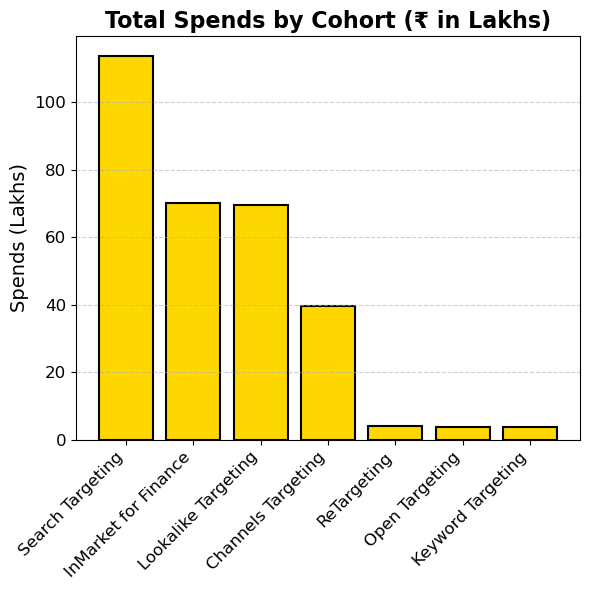

In [195]:
plt.figure(figsize=(6, 6))
plt.bar(
    spend_by_coht.index, 
    spend_by_coht['Spends_in_Lakhs'], 
    color='gold', 
    edgecolor='black', 
    linewidth=1.5
)
plt.title('Total Spends by Cohort (₹ in Lakhs)', fontsize=16, fontweight='bold')
plt.ylabel('Spends (Lakhs)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [197]:
week_cohort = df_1.groupby(['Weekday','Cohort'], as_index=False).size().sort_values(by = 'size', ascending=False)
week_cohort

,Weekday,Cohort,size
13,Monday,Search Targeting,581
27,Sunday,Search Targeting,539
20,Saturday,Search Targeting,403
6,Friday,Search Targeting,386
21,Sunday,Channels Targeting,383
41,Tuesday,Search Targeting,371
34,Thursday,Search Targeting,366
7,Monday,Channels Targeting,356
48,Wednesday,Search Targeting,355
14,Saturday,Channels Targeting,335


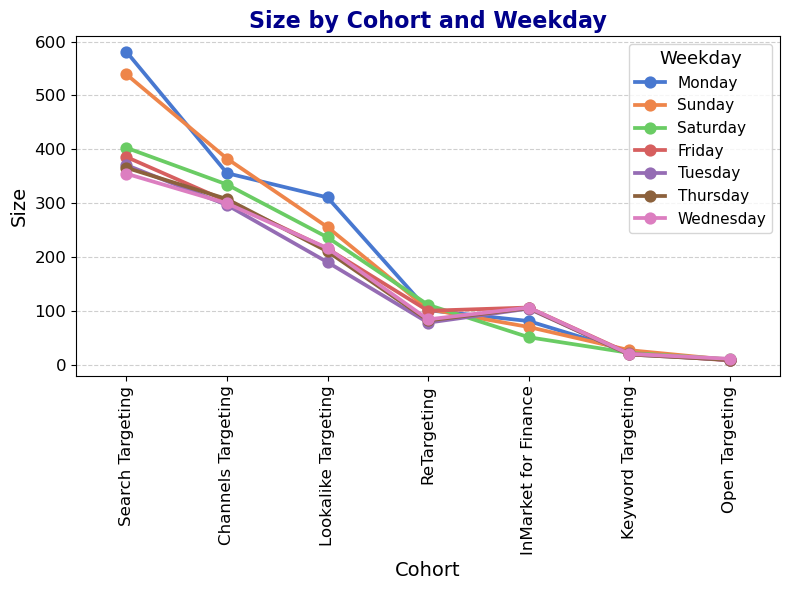

In [199]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='Cohort', y='size', hue='Weekday', data=week_cohort, markers='o', linestyles='-', palette='muted')

plt.title('Size by Cohort and Weekday', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Cohort', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Weekday', title_fontsize=13, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [202]:
day_reg_rate = df_1.groupby(['day']).agg({'Registration_Rate': 'mean'}).sort_values(by = 'day', ascending = True)
day_reg_rate

,Registration_Rate
day,
1,20.379006
2,24.419680
3,29.208237
4,27.062290
5,28.387353
6,25.464180
7,25.828429
8,53.506718
9,35.987654


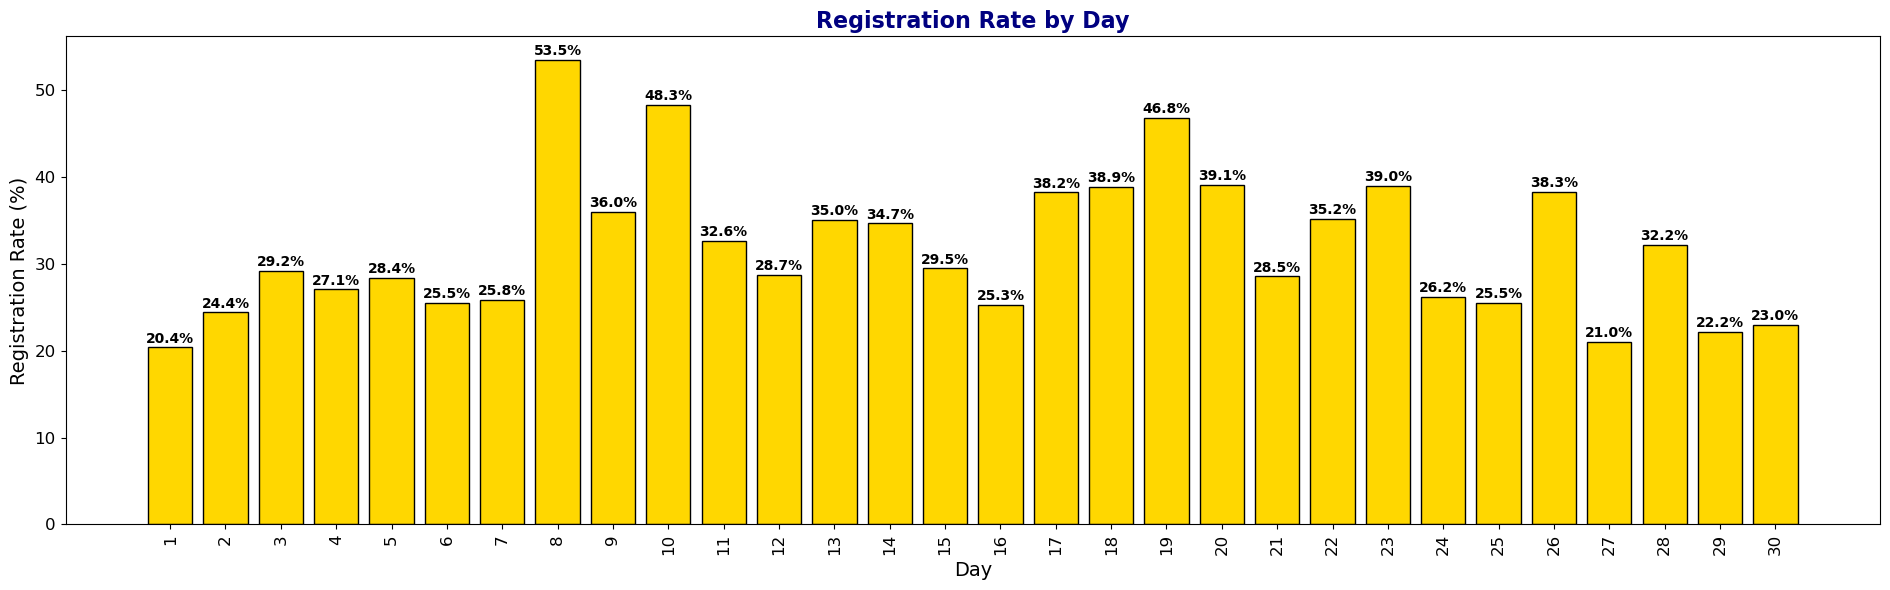

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(19,6))
bars = plt.bar(day_reg_rate.index, day_reg_rate['Registration_Rate'], color='#FFD700', edgecolor='black')

plt.title('Registration Rate by Day', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Registration Rate (%)', fontsize=14)
plt.xticks(ticks=day_reg_rate.index, labels=day_reg_rate.index, rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Annotate with value + %
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


In [207]:
df_1.head(2)

,Date,Region,Cohort,Format,Device,Gender,Age,Income,Spends,Impressions,Clicks,Views,Install,Registration,CTR,Install_Rate,Registration_Rate,Weekday,day
0,2024-09-01,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,43.0,287,8,0,0,0,2.787456,0.000000,NaN,Sunday,1
1,2024-09-02,AHD,InMarket for Finance,NoSkip,Android,Males,35-44,T30Inc,17233.0,121159,1181,0,2,0,0.974752,0.169348,0.0,Monday,2


# Spend Analysis

**Total Spend**

In [213]:
total_spend = df_1['Spends'].sum()
total_spend

30469820.0

In [215]:
df_1['Spends'].sum()/10000000

3.046982

**CPC (Cost per Click):**

In [218]:
cpc = total_spend/df_1['Clicks'].sum()
cpc

35.010427354944866

**CPI (Cost per Install):**

In [221]:
cpi = total_spend/df_1['Install'].sum()
cpi

4837.247182092396

In [223]:
total_spend/df_1['Install'].sum()/1000

4.837247182092396

**CPR (Cost per Registration):**

In [226]:
cpr = total_spend/df_1['Registration'].sum()
cpr

13548.163628279235

In [228]:
total_spend/df_1['Registration'].sum()/1000

13.548163628279235

In [230]:
spend_by_fort = df_1.groupby(['Format']).agg({'Spends': 'sum'}).sort_values(by = 'Spends', ascending = False)
spend_by_fort['Spends_in_Lakhs'] = (spend_by_fort['Spends'] / 1_00_000).round(2) 
spend_by_fort = spend_by_fort[['Spends_in_Lakhs']]
spend_by_fort

,Spends_in_Lakhs
Format,
NoSkip,191.62
Skip,113.07


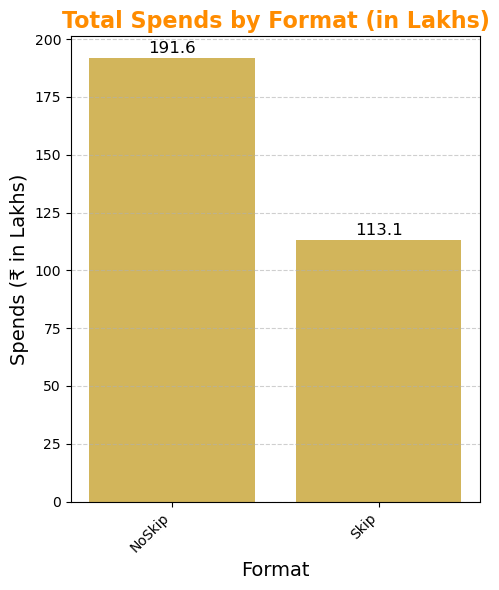

In [232]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(5, 6))
bars = plt.bar(spend_by_fort.index, spend_by_fort['Spends_in_Lakhs'], color='#D2B55B')  # Dark yellow hex

# Titles and labels
plt.title('Total Spends by Format (in Lakhs)', fontsize=16, fontweight='bold', color='darkorange')
plt.xlabel('Format', fontsize=14)
plt.ylabel('Spends (₹ in Lakhs)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotating each bar with value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [233]:
spend_by_coht = df_1.groupby(['Cohort']).agg({'Spends': 'sum'}).sort_values(by = 'Spends', ascending = False)
spend_by_coht['Spends_in_Lakhs'] = (spend_by_coht['Spends'] / 1_00_000).round(2) 
spend_by_coht = spend_by_coht[['Spends_in_Lakhs']]
spend_by_coht

,Spends_in_Lakhs
Cohort,
Search Targeting,113.90
InMarket for Finance,70.09
Lookalike Targeting,69.60
Channels Targeting,39.66
ReTargeting,3.99
Open Targeting,3.77
Keyword Targeting,3.69


In [236]:
spend_by_inco = df_1.groupby(['Income']).agg({'Spends': 'sum'}).sort_values(by = 'Spends', ascending = False)
spend_by_inco['Spends_in_Lakhs'] = (spend_by_inco['Spends'] / 1_00_000).round(2)
spend_by_inco = spend_by_inco[['Spends_in_Lakhs']]
spend_by_inco

,Spends_in_Lakhs
Income,
AllInc,123.59
T50Inc,102.61
T30Inc,78.50


In [238]:
spend_by_dev = df_1.groupby(['Device']).agg({'Spends': 'sum'}).sort_values(by = 'Spends', ascending = False)
spend_by_dev['Spends_in_Lakhs'] = (spend_by_dev['Spends'] / 1_00_000).round(2)
spend_by_dev = spend_by_dev[['Spends_in_Lakhs']]
spend_by_dev

,Spends_in_Lakhs
Device,
Android,183.02
CTV&Desktop,74.14
iOS,47.53


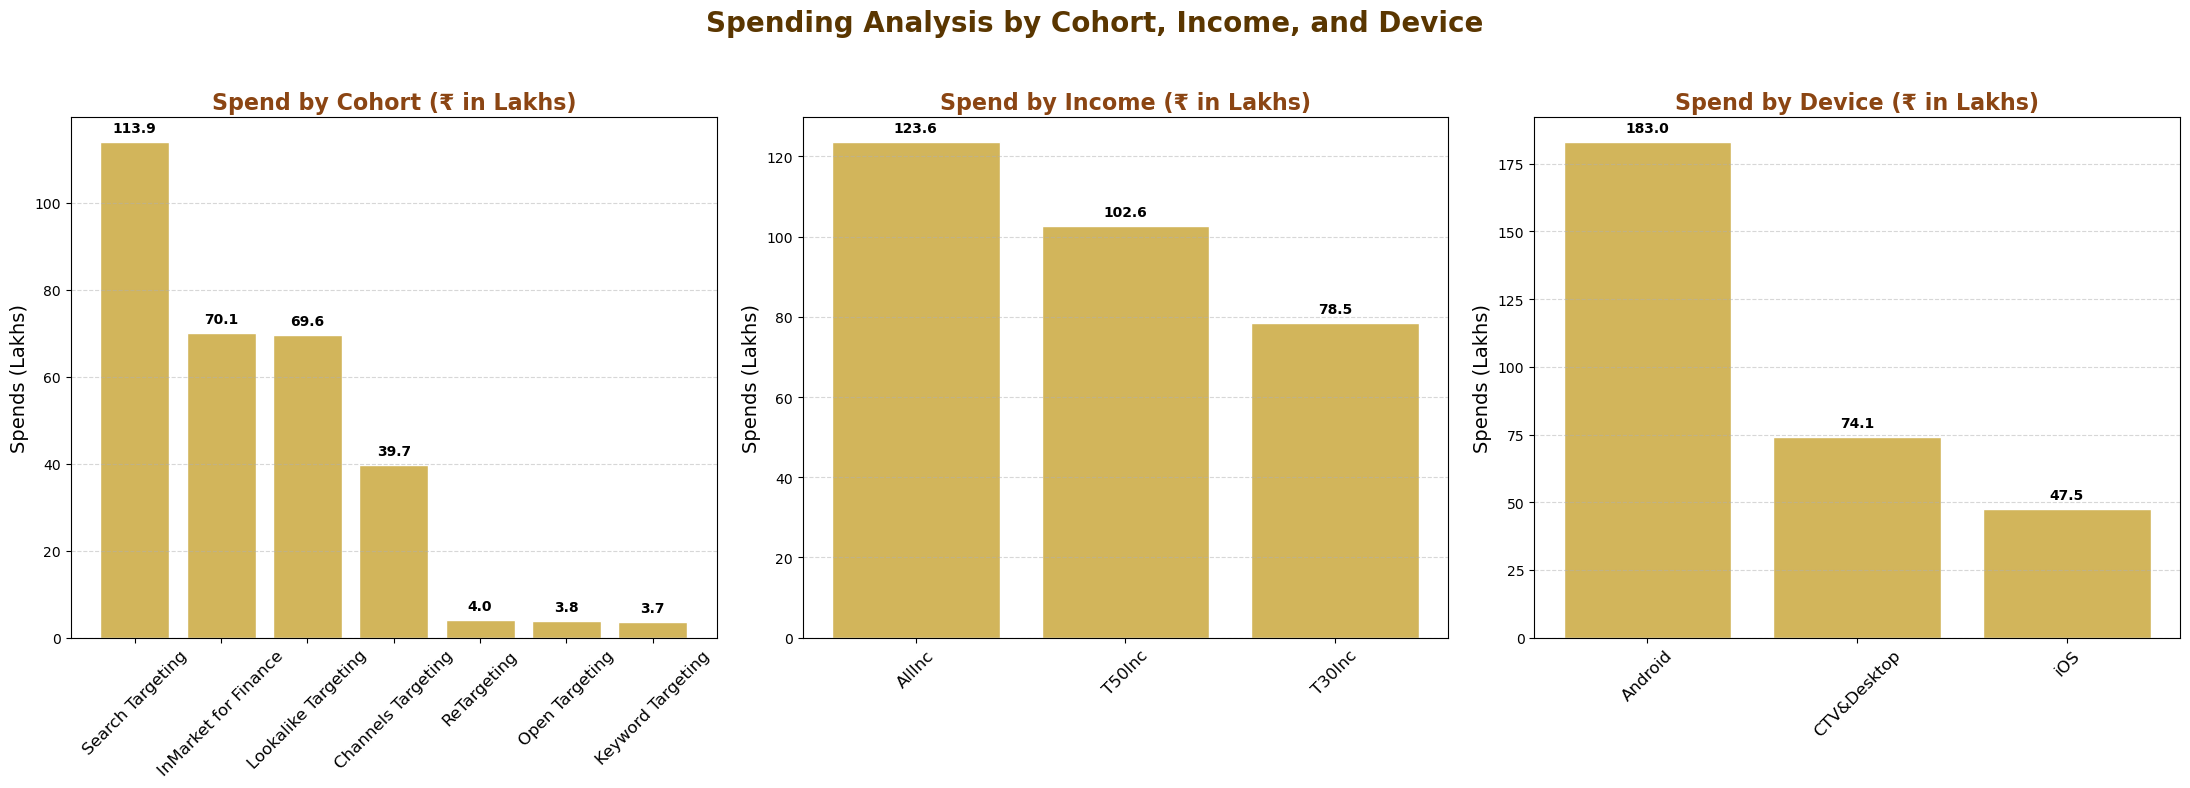

In [241]:
import matplotlib.pyplot as plt

# Define bar color and common styling
bar_color = '#D2B55B'
edge_color = 'white'
label_fontsize = 12
title_fontsize = 16
y_label_fontsize = 14

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 8))

# Plot function with common enhancements
def decorate_bar_chart(ax, data, title):
    bars = ax.bar(data.index, data['Spends_in_Lakhs'], color=bar_color, edgecolor=edge_color)
    ax.set_title(title, fontsize=title_fontsize, fontweight='bold', color='#8B4513')
    ax.set_ylabel('Spends (Lakhs)', fontsize=y_label_fontsize)
    ax.tick_params(axis='x', rotation=45, labelsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='black')

# Plotting each subplot
decorate_bar_chart(ax1, spend_by_coht, 'Spend by Cohort (₹ in Lakhs)')
decorate_bar_chart(ax2, spend_by_inco, 'Spend by Income (₹ in Lakhs)')
decorate_bar_chart(ax3, spend_by_dev, 'Spend by Device (₹ in Lakhs)')

# Super title
plt.suptitle('Spending Analysis by Cohort, Income, and Device', fontsize=20, fontweight='bold', color='#5A3600')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
